# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we are analysing the data of different movies released per year from 1960 to 2015. We are finding out the revenues generated by movies with respect to its budget and also check the popularity year over year. We are also checking out whether people prefer similar genre as produced by production houses.

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading and inspecting data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Performing check on columns that have missing values with info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

###### We can see that there are 21 data columns and total 10866 entries. Some of the columns such as homepage, taglines, keywords, production companies have missing values. Most of the columns are with data types as obeject and float.

In [4]:
# Getting descriptive statistics for each column of data

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### This statistic gives us information that average votes for maximum movies are 6. Most of the movies are released during 2006 - 2011. The runtime for movies is around 100. The average revenue is almost 3 times to that of budget.


### Data Cleaning

In [7]:
# Dropping columns which does not require

df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [23]:
# Confirming the result

df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


##### After dropping some columns, we have gathered required data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


##### The required columns gives us information about missing values

In [13]:
# Fill in missing values
df.fillna(0, inplace=True)

# Confirming the correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
director          10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### Q1: Do people prefer similar genres as produced by production houses?

In [14]:
# Finding out genres value count

genres_value_count = df['genres'].value_counts()
genres_value_count

Drama                                                 712
Comedy                                                712
Documentary                                           312
Drama|Romance                                         289
Comedy|Drama                                          280
Comedy|Romance                                        268
Horror|Thriller                                       259
Horror                                                253
Comedy|Drama|Romance                                  222
Drama|Thriller                                        138
Comedy|Family                                         102
Action|Thriller                                       101
Thriller                                               93
Drama|Comedy                                           92
Animation|Family                                       90
Crime|Drama|Thriller                                   81
Crime|Drama                                            74
Comedy|Horror 

In [16]:
# Finding out people voted for genres

genres_votes = df.groupby(['genres'])['vote_count'].sum()
genres_votes

genres
0                                                       403
Action                                                 8984
Action|Adventure                                       2604
Action|Adventure|Animation                              301
Action|Adventure|Animation|Comedy|Drama                  30
Action|Adventure|Animation|Comedy|Family                 17
Action|Adventure|Animation|Drama|Family                  25
Action|Adventure|Animation|Family                        70
Action|Adventure|Animation|Family|Fantasy               113
Action|Adventure|Animation|Family|Mystery                12
Action|Adventure|Animation|Family|Science Fiction      3117
Action|Adventure|Animation|Fantasy                       10
Action|Adventure|Animation|Fantasy|Horror                40
Action|Adventure|Animation|Fantasy|Science Fiction       41
Action|Adventure|Animation|Science Fiction              229
Action|Adventure|Animation|Science Fiction|Crime        161
Action|Adventure|Animation|Scienc

#### The production companies are preferring Drama and Comedy genres but people voted for Action genres.

### Q 2: Does movies with higher votes generate more revenues?

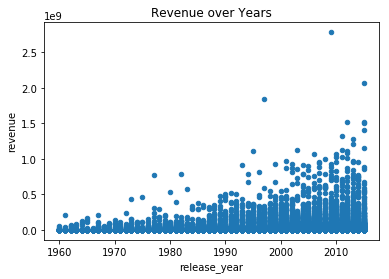

In [3]:
# Finding the corelation between release years and revenue generated by movies

df.plot(x='release_year', y='revenue', title="Revenue over Years", kind='scatter');

#### The graph shows revenue has increased over the year.

In [17]:
# Finding out the relation between vote_count and revenue

median = df['vote_count'].median()
vote_low = df.query('vote_count < {}'.format(median))
vote_high = df.query('vote_count > {}'.format(median))

revenue_low = vote_low['revenue'].mean()
revenue_high = vote_high['revenue'].mean()

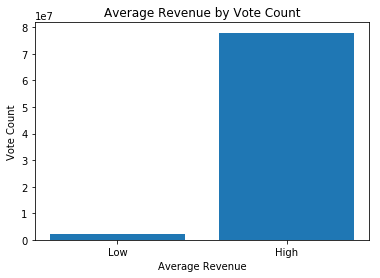

In [18]:
# Plotting graph to find out the answer

locations = [1, 2]
heights = [revenue_low, revenue_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue by Vote Count')
plt.xlabel('Average Revenue')
plt.ylabel('Vote Count');

#### The graph clearly shows that movies with higher votes generate more revenue.

### Q3: Do vote count and popularity increased as more and more movies get produced?

In [4]:
# Sorting and grouping the required columns based on years

df_srt = df[['release_year', 'original_title', 'revenue', 'popularity', 'vote_count', 'budget']].sort_values(['release_year'], ascending=True)
result = df_srt.groupby(['release_year']).agg({'original_title':['count'], 'revenue':['mean'], 'vote_count':['mean'], 'popularity':['sum'], 'budget':['mean']})
result

,original_title,revenue,vote_count,popularity,budget
,count,mean,mean,sum,mean
release_year,,,,,
1960,32,4.531406e+06,77.531250,14.685834,6.892796e+05
1961,31,1.089420e+07,77.580645,13.107641,1.488290e+06
1962,32,6.736870e+06,74.750000,14.553069,1.710066e+06
1963,34,5.511911e+06,82.823529,17.092019,2.156809e+06
1964,42,8.118614e+06,74.690476,17.321989,9.400753e+05
1965,35,1.308805e+07,52.000000,11.990529,2.005860e+06
1966,46,1.842102e+06,31.739130,13.989152,1.251191e+06
1967,40,1.844587e+07,77.550000,18.846147,2.516305e+06


In [5]:
# Writting a function for hist graph

def display_histplot(variable, xlabel, ylabel, title):
    """	This function will plot a histogram graph for provided data frame.

    Args:
        variable: data for plotting a graph
        xlabel: to add a x-axis label
        ylabel: to add a y-axis label
        title: to add a plot title

    Example:
        display_histplot(df['column'], 'x label', 'y label', 'plot title')

    """
    variable.plot(kind="hist", figsize=(8,8))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

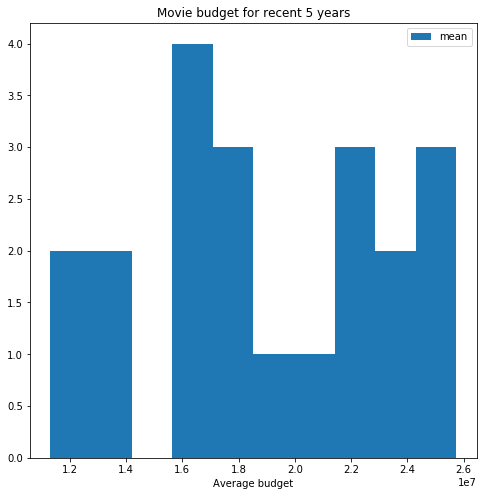

In [6]:
# Checking the movie budget for recent 5 years

data_budget = result.loc[1995:2015, 'budget']
display_histplot(data_budget, 'Average budget', '', 'Movie budget for recent 5 years')

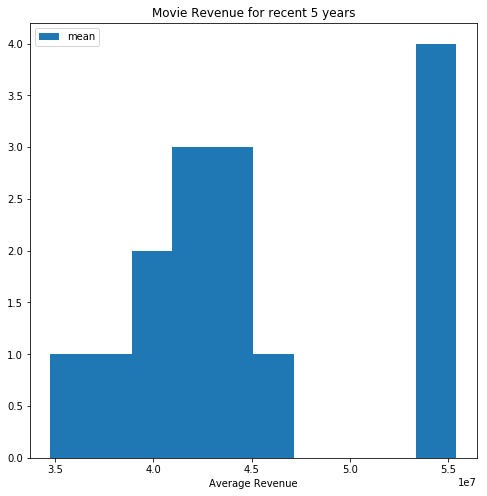

In [7]:
# Checking the revenue for recent 5 years

data = result.loc[2001:2015, 'revenue']
display_histplot(data, 'Average Revenue', '', 'Movie Revenue for recent 5 years')

In [8]:
# Creating a fuction for bar graph

def display_barplot(variable, xlabel, ylabel, title):
    """	This function will plot a bar graph for provided data frame.

    Args:
        variable: data for plotting a graph
        xlabel: to add a x-axis label
        ylabel: to add a y-axis label
        title: to add a plot title

    Example:
        display_barplot(df['column'], 'x label', 'y label', 'plot title')

    """
    variable.plot(kind="bar", stacked=True, figsize=(20,10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

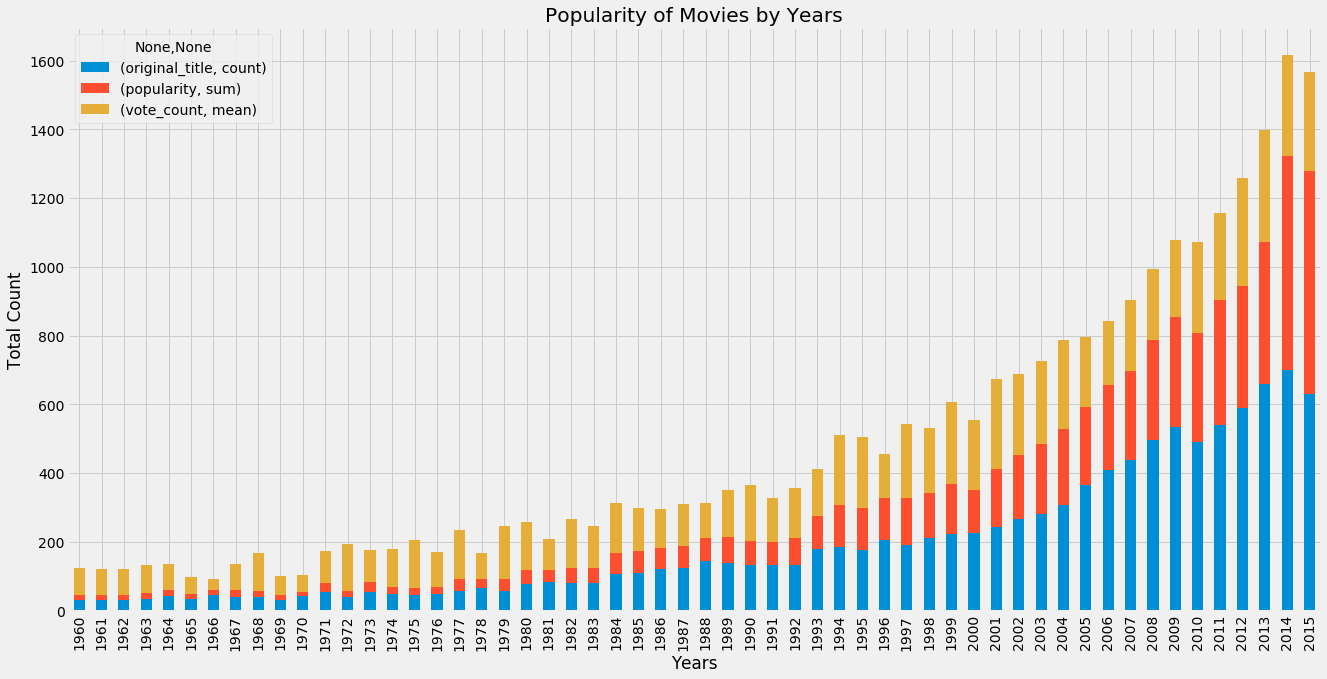

In [9]:
# Plotting bar graph to get the answer

matplotlib.style.use('fivethirtyeight')
display_barplot(result[['original_title', 'popularity', 'vote_count']], 'Years', 'Total Count', 'Popularity of Movies by Years')

#### We can clearly see that movies are getting more popular over year but there is less increment in vote count as compared with popularity of movies.

### Q4: What is the budget and revenue generation trend year over year?

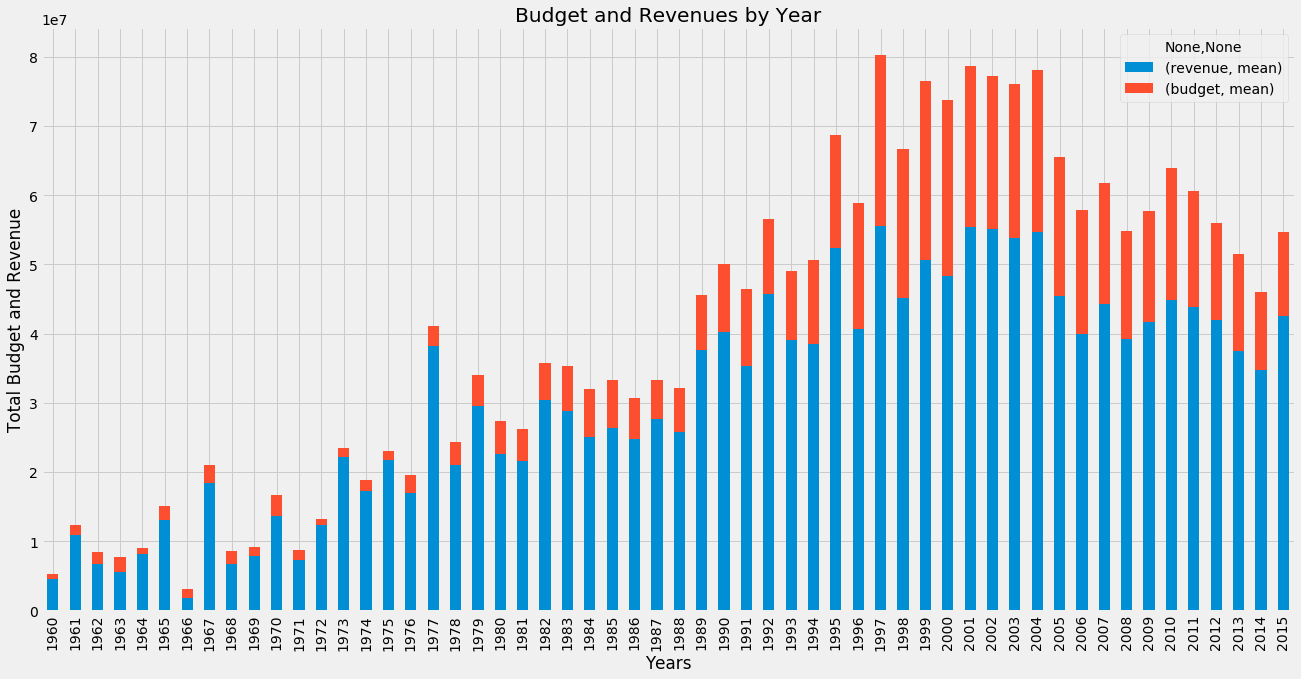

In [10]:
# Plotting another graph based on information gathered in Q3 to get this answer

matplotlib.style.use('fivethirtyeight')
display_barplot(result[['revenue', 'budget']], 'Years', 'Total Budget and Revenue', 'Budget and Revenues by Year')

#### The revenue is always high as compared with the budget and as year passes, budget for movies also increased.

<a id='conclusions'></a>
## Conclusions

In this project, we analysed the data of different movies released per year from 1960 to 2015. The analysis required dropping of almost 50% of columns and adjusting the missing values to get the required data. 

This analysis shows that people are more intesrested in watching movies which is generating higher revenue over the period of years by looking at average revenue by vote count and popularity of movies by years graphs. We can also see from Scatterplot and Budget-Revenue by years graph that more money is being invested into making films which results into increased number of films per year, specially, in last 2 decades.

#### Limitations:
1. No categorization by genres: The movie data does not provide a categorization by genres based on either popularity or revenue. It could have helped in better comparision and finding out significant differences.
2. Number of data columns: The number of columns in data set is large which creates chaos during analysis.

This project can be improved further by sorting the data according to the sample numbers and depicting the ratio of one feature in different categories. Also, scatterplot can be used further to depict the relations between two continuous features.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0